In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from ultralytics import YOLO

In [3]:
RUN_DIR = PROJECT_ROOT / "models" / "runs" / "fruitninja_yolo11n2"
BEST = RUN_DIR / "weights" / "best.pt"
DATA_YAML = PROJECT_ROOT / "datasets" / "fruitninja_yolo" / "data.yaml"

In [4]:
model = YOLO(BEST)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [5]:
results_csv = RUN_DIR / "results.csv"
df = pd.read_csv(results_csv)
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,7.57965,1.19912,3.82909,1.14993,0.00703,0.98980,0.01636,0.00877,1.10189,3.43713,0.97843,0.000100,0.000100,0.000100
1,2,9.85069,1.28239,3.21535,1.09046,0.00692,1.00000,0.22156,0.13349,1.06974,3.20545,0.95283,0.000212,0.000212,0.000212
2,3,11.48480,1.17578,2.29333,1.07268,0.00693,1.00000,0.51836,0.21090,1.09354,3.12644,0.93194,0.000320,0.000320,0.000320
3,4,13.02560,1.29018,1.95650,1.12561,0.00692,0.98980,0.57424,0.26986,1.14069,3.23020,0.99605,0.000423,0.000423,0.000423
4,5,14.68740,1.27420,1.80075,1.15150,0.00587,0.92857,0.50885,0.19399,1.03228,3.34830,1.01541,0.000522,0.000522,0.000522


In [6]:
df.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,82.2052,0.69871,0.75552,0.89056,0.93992,0.93757,0.95899,0.69638,0.96913,0.66108,0.98116,0.000182,0.000182,0.000182
46,47,83.9086,0.67669,0.72730,0.88624,0.94822,0.93537,0.95843,0.70671,0.94430,0.65056,0.98290,0.000149,0.000149,0.000149
47,48,85.4423,0.67792,0.73406,0.88455,0.94820,0.92352,0.96021,0.70796,0.94434,0.63926,0.98895,0.000116,0.000116,0.000116
48,49,86.9343,0.67078,0.70802,0.87481,0.94976,0.91837,0.96000,0.71701,0.94064,0.63600,0.99054,0.000083,0.000083,0.000083
49,50,88.5524,0.66777,0.70259,0.86281,0.95359,0.92857,0.96116,0.72188,0.93669,0.63056,0.99094,0.000050,0.000050,0.000050


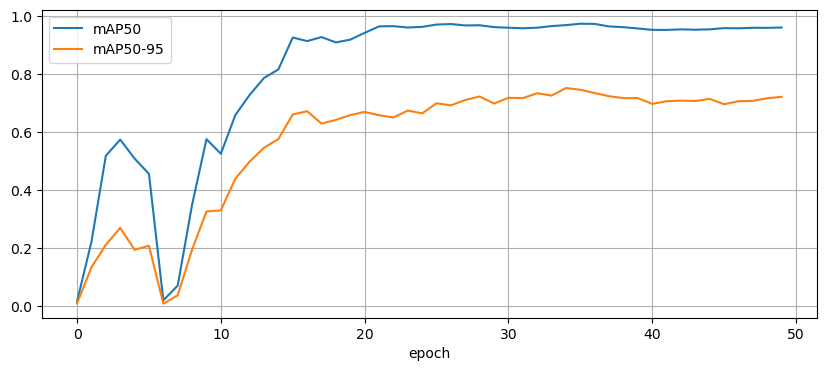

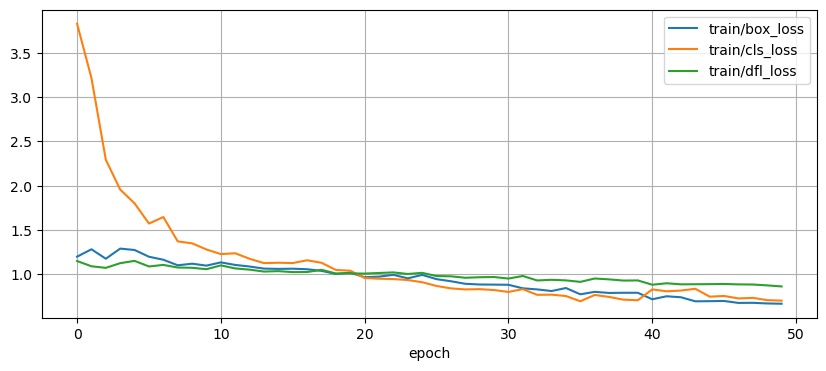

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df["train/box_loss"], label="train/box_loss")
plt.plot(df["train/cls_loss"], label="train/cls_loss")
plt.plot(df["train/dfl_loss"], label="train/dfl_loss")
plt.xlabel("epoch")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
val_metrics = model.val(data=str(DATA_YAML), split="val")
val_metrics

Ultralytics 8.3.248  Python-3.11.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)


YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients
val: Fast image access  (ping: 0.00.0 ms, read: 295.321.5 MB/s, size: 22.6 KB)
val: Scanning C:\Users\Pichau\Desktop\Programacao\FruitNAI\datasets\fruitninja_yolo\labels\val.cache... 29 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 29/29 19.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.2s/it 2.4s7.2s
                   all         29         57      0.932      0.966      0.969      0.752
                 fruit         25         49      0.901      0.933      0.944      0.693
                  bomb          7          8      0.963          1      0.995       0.81
Speed: 1.8ms preprocess, 15.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\notebooks\runs\detect\val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001540DEE8250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [9]:
def predict_and_show(model, image_paths, conf=0.25, imgsz=640):
    n = len(image_paths)
    cols = 3
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1:
        axes = np.array([axes])

    for i in range(rows * cols):
        r = i // cols
        c = i % cols
        ax = axes[r, c]
        ax.axis("off")

        if i >= n:
            continue

        p = str(image_paths[i])
        results = model.predict(source=p, conf=conf, imgsz=imgsz, verbose=False)
        im = results[0].plot()  # ndarray BGR
        im = im[..., ::-1]      # BGR -> RGB

        ax.imshow(im)
        ax.set_title(Path(p).name)

    plt.tight_layout()
    plt.show()

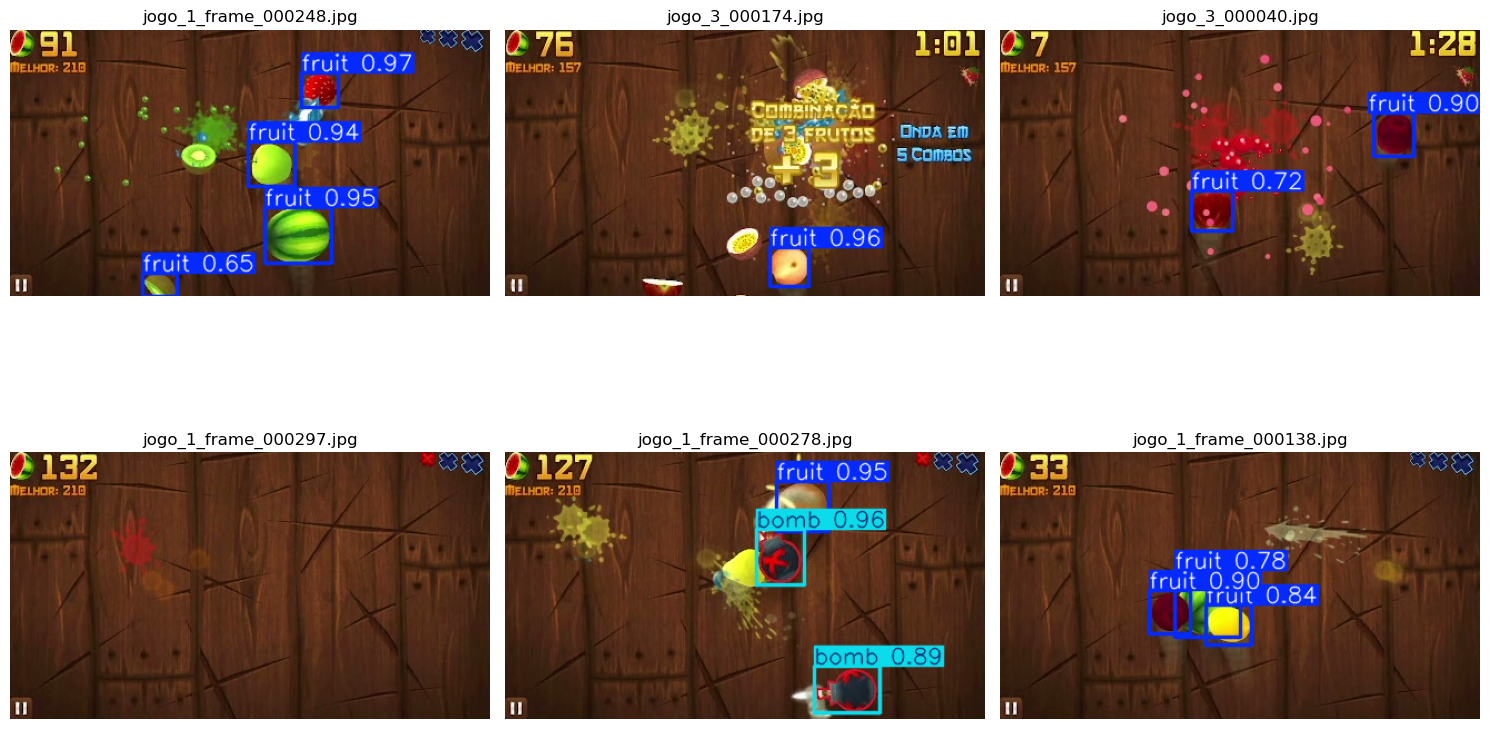

In [10]:
VAL_IMAGES_DIR = PROJECT_ROOT / "datasets" / "fruitninja_yolo" / "images" / "val"
val_imgs = sorted(list(VAL_IMAGES_DIR.glob("*.jpg")))
sample_imgs = random.sample(val_imgs, 6)
predict_and_show(model, sample_imgs, conf=0.25, imgsz=640)

In [ ]:
VIDEO = PROJECT_ROOT / "data" / "raw_videos" / "jogo_2.mp4"

model.predict(
    source=str(VIDEO),
    conf=0.25, 
    imgsz=640,
    show=True,
    save=True,
    project=RUN_DIR,
    name="inference_video"
)

WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n\inference_video


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fruit', 1: 'bomb'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 

In [11]:
model.export(format="onnx", imgsz=640)

Ultralytics 8.3.248  Python-3.11.14 torch-2.5.1 CPU (AMD Ryzen 7 5700X 8-Core Processor)



PyTorch: starting from 'C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n2\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.2 MB)

ONNX: starting export with onnx 1.20.0 opset 19...
ONNX: slimming with onnxslim 0.1.82...
ONNX: export success  4.1s, saved as 'C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n2\weights\best.onnx' (10.1 MB)

Export complete (4.6s)
Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n2\weights
Predict:         yolo predict task=detect model=C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n2\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n2\weights\best.onnx imgsz=640 data=../datasets/fruitninja_yolo/data.yaml  
Visualize:       https://netron.app


'C:\\Users\\Pichau\\Desktop\\Programacao\\FruitNAI\\models\\runs\\fruitninja_yolo11n2\\weights\\best.onnx'